<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Артём! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**План проекта:**
1) Открытие и изучение файла с данными \
2) Разбиение данных на обучающую, валидационную и тестовую выборки \
3) Исследование трёх моделей — `DecisionTreeClassifier`, `RandomForestClassifier`, `LogisticRegression` \
4) Проверка исследуемых моделей на тестовой выборке \
5) Проверка исследуемых моделей на адекватность \
6) Общий вывод

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from tqdm import tqdm

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    
    


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодится )  



## Откройте и изучите файл

In [2]:
# Получим данные о поведении клиентов безопасным способом при помощи конструкции try-except
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Молодец что используешь конструкцию try - except (if - else), этим ты проявляешь уважение к тем кто будет работать с твоим кодом.

</div>

In [3]:
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


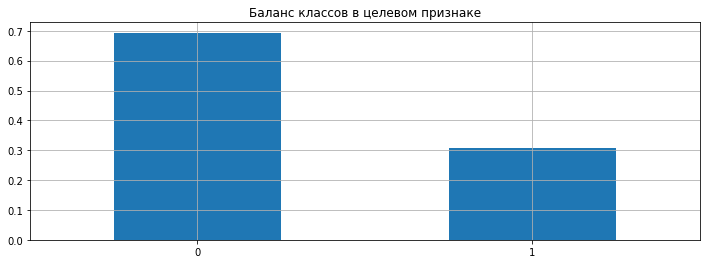

In [6]:
data.is_ultra.value_counts(normalize=True).plot(kind='bar', 
                                                figsize=(12, 4),
                                                title='Баланс классов в целевом признаке',
                                                grid=True);
plt.xticks(rotation=360);

In [7]:
data.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


Благодаря выводу метода `info()` можно заметить, что:
* в данных отсутствуют пропуски
* в данных отсутствуют несоответствия типов
* в данных отсутствуют нарушения правила хорошего стиля в названии столбцов

В описании проекта сказано, что предобработка данных не понадобится, поэтому этот этап мы пропустим. Разобъём данные на выборки, а после этого сразу перейдём к исследованию моделей.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.


    

<div class="alert alert-warning">



Совет: 


- .info (дает тебе информацию о пропусках и типах данных), а .describe (медианы, квантили, max, min итд) это такой джентльменский набор при первичной разведке данных (EDA).  



- Можно еще отдельно проверить датасет на сбалансированность классов в таргете. Это помогло бы решить бонусное задание сразу (Только не надо балансировать данные, это тема следующего проекта).




- Можно посмотреть корреляцию признаков. Знаешь что такое мультиколлинеарность, какие два типа проблем возникает, для каких моделей и какие варианты решения?




</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий</b></font>
    
Обновлено
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Отлично.  Как едешь у нас и дисбаланс, и мультиколлинеарность




</div>


## Разбейте данные на выборки

In [8]:
# Вспомогательная функция для подсчёта соотношения размера некоторой выборки от размера данных
def size_pct(sample_data):
    return round(sample_data.shape[0] / len(data), 2) * 100

In [9]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1
train_data, test_data = train_test_split(data, test_size=0.2, random_state=12345, stratify=data.is_ultra)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=12345, stratify=train_data.is_ultra)

In [10]:
# check
print(f'Соотношение размера обучающей выборки от размера данных: {size_pct(train_data)}%')
print(f'Соотношение размера валидационной выборки от размера данных: {size_pct(valid_data)}%')
print(f'Соотношение размера тестовой выборки от размера данных: {size_pct(test_data)}%')

Соотношение размера обучающей выборки от размера данных: 60.0%
Соотношение размера валидационной выборки от размера данных: 20.0%
Соотношение размера тестовой выборки от размера данных: 20.0%


Для удобства создадим отдельные переменные для признаков и целевого признака 

In [11]:
# Разделим обучающую выборку
train_features = train_data.drop(['is_ultra'], axis=1) 
train_target = train_data['is_ultra']

# Разделим валидационную выборку
valid_features = valid_data.drop(['is_ultra'], axis=1)
valid_target = valid_data['is_ultra']

# Разделим тестовую выборку
test_features = test_data.drop(['is_ultra'], axis=1)
test_target = test_data['is_ultra']

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все правильно!

Здорово что проконтролировано разбиение (можно с помощью .shape,  можно .len)



<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут





<div class="alert alert-info">
<font size="5"><b>Комментарий</b></font>
    
Обновлено
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


## Исследуйте модели

In [12]:
# Функция для обновления наилучшей модели
def best_model_update(best_model, best_accuracy, model_constructor, params):
    model = model_constructor(**params)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    accuracy = accuracy_score(valid_target, predictions)
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy
        
    return best_model, best_accuracy

100%|██████████| 91/91 [00:04<00:00, 21.74it/s]


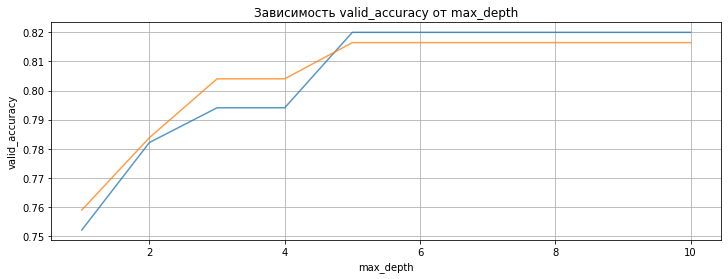

In [13]:
# Перебором значений гиперпараметра max_depth найдём наилучшую модель решающего дерева
train_accuracy_list = []
valid_accuracy_list = []

best_tree_model = None
best_tree_accuracy = 0.0
for depth in tqdm(range(1, 51)):
    best_tree_model, best_tree_accuracy = best_model_update(best_tree_model,
                                                            best_tree_accuracy,
                                                            DecisionTreeClassifier,
                                                            {'max_depth': depth, 'random_state': 12345})
    
    # Сохраним точность текущей модели дерева решений на обучающей и валидационной выборках в список для построения графиков
    train_accuracy_list.append(accuracy_score(train_target, best_tree_model.predict(train_features)))
    valid_accuracy_list.append(best_tree_accuracy)
    

# Перебором значений гиперпараметров n_estimators и max_depth найдём наилучшую модель случайного леса
best_forest_model = None
best_forest_accuracy = 0.0
for est in tqdm(range(10, 51)):
    for depth in range (1, 11):
        best_forest_model, best_forest_accuracy = best_model_update(best_forest_model,
                                                                    best_forest_accuracy,
                                                                    RandomForestClassifier,
                                                                    {'max_depth': depth, 
                                                                     'n_estimators': est,
                                                                     'random_state': 12345})

# Перебором значений гиперпараметра max_iter найдём наилучшую модель логистической регрессии
best_logistic_model = None
best_logistic_accuracy = 0.0
for max_iter in tqdm(range(100, 1001, 10)):
    best_logistic_model, best_logistic_accuracy = best_model_update(best_logistic_model,
                                                                    best_logistic_accuracy,
                                                                    LogisticRegression,
                                                                    {'solver': 'lbfgs', 
                                                                     'max_iter': max_iter,
                                                                     'random_state': 12345})
    

# Построим графики зависимости accuracy от max_depth на обучающей и валидационной выборках
ax = pd.DataFrame((zip(range(1, 11), train_accuracy_list)), columns=['max_depth', 'train_accuracy']).plot(
    'max_depth',
    'train_accuracy',
    figsize=(12, 4),
    legend=False,
    grid=True,
    alpha=0.75,
    xlabel='max_depth',
    ylabel='train_accuracy',
    title='Зависимость train_accuracy от max_depth');

pd.DataFrame((zip(range(1, 11), valid_accuracy_list)), columns=['max_depth', 'valid_accuracy']).plot(
    'max_depth',
    'valid_accuracy',
    ax=ax,
    figsize=(12, 4),
    legend=False,
    grid=True,
    alpha=0.75,
    xlabel='max_depth',
    ylabel='valid_accuracy',
    title='Зависимость valid_accuracy от max_depth');

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Логика моделирования не нарушена

 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле





<div class="alert alert-warning">


Совет: 



    
- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить )) 
    
    Или tqdm, это ещё лучше, потому что он показывает интерактивно, на каком этапе расчетов мы находимся

    
    from tqdm import tqdm


    for n_estimators in tqdm(range(3,58)):

        ..........



(дальше мы будем уходить от неэффективных в питоне циклов к apply.  Там тоже есть аналог прогресс-баров:  .progress_apply)
    
И будет красиво )   
     
    
    
Советы для дерева решений:


- Можно добавить график, хорошо оформленный график украсит проект. Тут на графике можно посмотреть как при изменении max_depth меняется точность на train и validation датасете (для этого собираем наши метрики на валидации и train в списки, а затем по ним обычный plt.plot()) Такой способ используют чтобы лучше отследить переобучение, но для этого стоит взять пернебор по max_depth поглубже


- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 




</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий</b></font>
    
Обновлено
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Я предлагал построить график,  на котором будет видно как у дерева решения, после достижения пика, начинает падать   Метрика на валидации по мере увеличение глубины дерева, в то время как Метрика на тренировочной стремится к единице. Такая наглядная иллюстрация процесса переобучения


In [14]:
# check
print(f'Наилучшее значение accuracy для модели DecisionTreeClassifier — {round(best_tree_accuracy, 4)}')
print(f'Наилучшее значение accuracy для модели RandomForestClassifier — {round(best_forest_accuracy, 4)}')
print(f'Наилучшее значение accuracy для модели LogisticRegression — {round(best_logistic_accuracy, 4)}')

Наилучшее значение accuracy для модели DecisionTreeClassifier — 0.8165
Наилучшее значение accuracy для модели RandomForestClassifier — 0.832
Наилучшее значение accuracy для модели LogisticRegression — 0.7558


In [15]:
# check
print('Оптимальное значение параметра max_depth для модели DecisionTreeClassifier —', best_tree_model.get_params()['max_depth'])
print('Оптимальные значения параметров max_depth и n_estimators для модели RandomForestClassifier —',
      best_forest_model.get_params()["max_depth"],
      best_forest_model.get_params()["n_estimators"])
print('Оптимальное значение параметра max_iter для модели LogisticRegression —', best_logistic_model.get_params()["max_iter"])

Оптимальное значение параметра max_depth для модели DecisionTreeClassifier — 5
Оптимальные значения параметров max_depth и n_estimators для модели RandomForestClassifier — 8 10
Оптимальное значение параметра max_iter для модели LogisticRegression — 100


При помощи перебора различных значений мы нашли оптимальные гиперпараметры для каждой из моделей:
- `DecisionTreeClassifier` со значением `max_depth = 7`
- `RandomForestClassifier` со значением `max_depth = 10` и `n_estimators = 36`
- `LogisticRegression` со значением `max_iter = 100`

Наилучшее значение `accuracy` на валидационной выборке показала модель `RandomForestClassifier` — `0.832`


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно, RF лучший. 


<div class="alert alert-warning">


Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





<div class="alert alert-info">
<font size="5"><b>Комментарий</b></font>
    
- Такая ситуация называется переобучением. На графике выше можно увидеть, что при увеличении max_depth с 4 до 5 метрика качества на валидационной выборке стала снижаться, а на обучающей наоборот продолжила увеличиваться.
    
- Возможно потому, что модель RF представляет из себя ансамбль деревьев. В статистике хорошо известно интуитивное соображение, согласно которому усреднение результатов наблюдений может дать более устойчивую и надежную оценку.
    
- Насколько мне известно логистическая регрессия предсказывает вероятность принадлежности объекта к тому или иному классу, то есть число из отрезка [0, 1], а затем уже к этому числу применяется какой-нибудь decision rule (например p >= 0.5), который помогает классифицировать объект.
    
- Эта модель более простая, чем например RF. У неё меньше параметров поэтому она может хуже улавливать сложные закономерности. Зато у неё почти нет проблем с переобучением.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Верно, переобучение. Что ты на графике плохо видно )
    
    
2. Да, в RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. А можно и так сказать, и действительно у Логистической регрессии с переобучением нет проблем. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. 


</div>

## Проверьте модель на тестовой выборке

In [16]:
# Тестируем модель RandomForestClassifier
best_forest_model.fit(pd.concat([train_features, valid_features]), pd.concat([train_target, valid_target]))
print('Значение accuracy на тестовой выборке для наилучшей модели RandomForestClassifier —',
      round(accuracy_score(test_target, best_forest_model.predict(test_features)), 4))

Значение accuracy на тестовой выборке для наилучшей модели RandomForestClassifier — 0.8149


Наилучшее значение `accuracy` на тестовой выборке также показала модель `RandomForestClassifier` — `0.8149`. Оно практически совпадает со значением `accuracy` на валидационной выборке


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>




Ошибка:




К данному этапу мы должны подойти с одной выбранной моделью. Артём, о логике использования датасетов:
    




1. На train мы обучаем
2. По валидации смотрим на результаты обучения (следим чтобы не было переобучения и/или делаем подбор гиперпараметров).  И выбираем лучшую модель. 
3. Тестовая (out-of_sample) у нас для финальной проверки, когда определена модель с конкретными гиперпараметрами. Использование тестовой выборки, чтобы еще раз посмотреть на модели - это нарушение логической цепочки моделирования. 

А в таком виде, может сложиться впечатление что мы на тестовой по прежнему что то выбираем, но выбор сделан, и если лучшая на валидации покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала.
    
 [Вот](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0   ) тут можно дополнительно почитать.

<div class="alert alert-warning">
   
Совет: 

- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий</b></font>
    
Обновлено
</div>



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

А теперь логика не нарушена. Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом. Тобой подбиралась лучшая комбинация не по одному гиперпараметру + дообучил и вот он результат!






</div>

## (бонус) Проверьте модели на адекватность

In [17]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(pd.concat([train_features, valid_features]), pd.concat([train_target, valid_target]))

print('Точность наивной модели на тестовой выборке:', round(accuracy_score(test_target, dummy_model.predict(test_features)), 4))

Точность наивной модели на тестовой выборке: 0.6936


Мы проверили нашу наилучшую модель на адекватность. В результате точность наилучшей модели `RandomForestClassifier` значительно превосходит точность наивной модели. (`0.8149` против `0.6936`)




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:


Смысл проверки на адекватность в нашем проекте, это сравнение прогноза нашей лучшей модели, с прогнозом наивной модели

Артём, бонусное на то и бонусное, но можешь попробовать его решить с моей подсказкой.    

Ключевое это помнить  что у нас дисбаланс в таргете (нулей гораздно больше чем единиц) и четко понимать как считается accuracy.
В чем смысл проверки модели на адекватность  при дисбалансе? Вот смотри - обучили мы какую то модель, которая на test показывает 90% accuraсy. Шикарная модель скажем мы. А если в датасете у нас в метках таргета единичек 99,9% (допустим тренируем на данных где 1 это "кирпич упал на голову человеку когда он вышел из дома"), а нулей 0,1% ("не упал")?! Все также утверждаем что наша модель шикарная?! Нет, потому что всегда можно предсказывать что не упадает (единички) и accuracy будет равна 99,9%

Вот и тут мы сравниваем нашу обученную модель с примитивным прогнозом самого частого таргета. Какой у нас самый частый класс? Нули. Так посмотри accuracy_score target_test и ряда из одних нулей. Сколько будет?. 


    
    

При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей и сделает тоже самое что я описал на словах

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий</b></font>
    
Обновлено
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


## Общий вывод

- Мы открыли и изучили файл с данными. Предобработка данных нам не понадобилась, поэтому этот этап мы пропустили
- Мы разбили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1
- Мы исследовали три модели — `DecisionTreeClassifier`, `RandomForestClassifier`, `LogisticRegression`. На валидационной выборке лучше всего показала себя модель `RandomForestClassifier`. Значение `accuracy` у этой модель — `0.832`
- Мы проверили наилучшую модель `RandomForestClassifier` на тестовой выборке. Значение `accuracy` в данном случае — `0.8149`. Оно практически совпадает со значением `accuracy` на валидационной выборке
- Мы проверили наилучшую модель `RandomForestClassifier` на адекватность, сравнив её с наивной моделью. В результате точность наилучшей модели `RandomForestClassifier` значительно превосходит точность наивной модели. (`0.8149` против `0.6936`)


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Артём, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют, с комментированием кода тоже никаких проблем нет, твоих объяснений достаточно для понимания коллегами хода твоих мыслей. 

    
    
    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 




- обрати внимание на проверку сбалансированность классов в таргете в разделе EDA
- использовать stratify
- добавить график метрики    
- как можно улучшить результаты 



    
    
Обязательное к исправлению:





- к моменту проверки качества прогноза на тесте, приходим с уже одной выбранной моделью с лучшими гиперпараметрами выбранными на валидации

- стоит переделать бонусное задание с учётом моего комментария (по желанию, это все таки бонусное)
 

    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 





</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено,  желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.



Отличная работа Артём. Желаю успехов в дальнейшей учебе!


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 4: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
